In [1]:
import numpy as np 
import pandas as pd 

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import folium
from folium import plugins


In [37]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [38]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [39]:
df.host_name = df.host_name.astype(str)

In [40]:
df.host_name.dtype

dtype('O')

In [101]:
df.a = df.host_name.str.split()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [102]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,first,second,first,second
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,first,second,John,None
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,first,second,Jennifer,None
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,first,second,Elisabeth,None
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,first,second,LisaRoxanne,None
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,first,second,Laura,None
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,first,second,Chris,None
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,first,second,Garon,None
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,first,second,Shunichi,None
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,first,second,MaryEllen,None
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,first,second,Ben,None


In [103]:
def find_couples(st):
    if len(st)>=3:
        return pd.Series({"first" : st[0], "second": st[2], "are_couple": "Yes"})
    
    return pd.Series({"first" : st[0], "second": None, "are_couple":"No"})

In [104]:
df = pd.concat([df, df.a.apply(find_couples)], axis=1)

In [105]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,first,second,first,second,first,second,are_couple
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0.21,6,365,first,second,John,None,John,None,No
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0.38,2,355,first,second,Jennifer,None,Jennifer,None,No
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,1,365,first,second,Elisabeth,None,Elisabeth,None,No
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,4.64,1,194,first,second,LisaRoxanne,None,LisaRoxanne,None,No
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,0.10,1,0,first,second,Laura,None,Laura,None,No
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,0.59,1,129,first,second,Chris,None,Chris,None,No
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,0.40,1,0,first,second,Garon,None,Garon,None,No
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,3.47,1,220,first,second,Shunichi,None,Shunichi,None,No
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,0.99,1,0,first,second,MaryEllen,None,MaryEllen,None,No
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,...,1.33,4,188,first,second,Ben,None,Ben,None,No


How many couples' postings vs individuals 

In [106]:
df[df.are_couple=="Yes"].shape

(1983, 23)

In [107]:
df[df.are_couple=="No"].shape

(46912, 23)

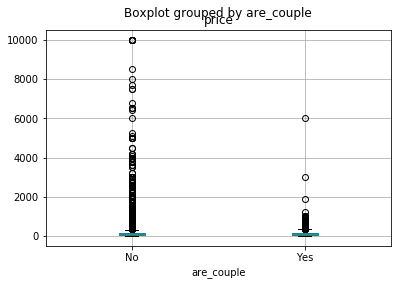

In [110]:
df.boxplot(column='price', by='are_couple')


In [111]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,first,second,first,second,first,second,are_couple
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0.21,6,365,first,second,John,None,John,None,No
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0.38,2,355,first,second,Jennifer,None,Jennifer,None,No
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,1,365,first,second,Elisabeth,None,Elisabeth,None,No
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,4.64,1,194,first,second,LisaRoxanne,None,LisaRoxanne,None,No
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,0.10,1,0,first,second,Laura,None,Laura,None,No
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,0.59,1,129,first,second,Chris,None,Chris,None,No
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,0.40,1,0,first,second,Garon,None,Garon,None,No
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,3.47,1,220,first,second,Shunichi,None,Shunichi,None,No
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,0.99,1,0,first,second,MaryEllen,None,MaryEllen,None,No
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,...,1.33,4,188,first,second,Ben,None,Ben,None,No


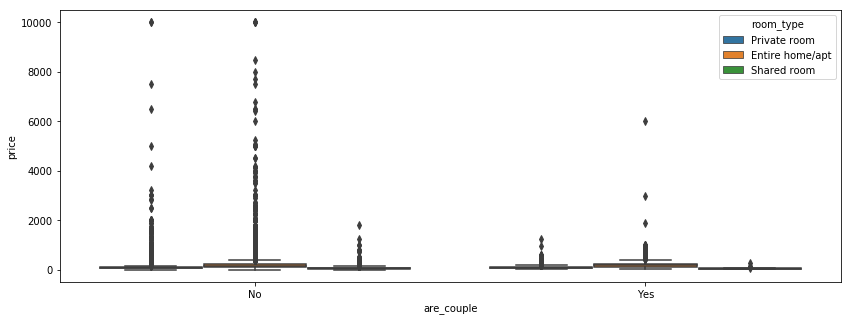

In [127]:
ax = sns.boxplot(x="are_couple", y="price", data=df, hue="room_type" )
ax.figure.set_size_inches(14,5)

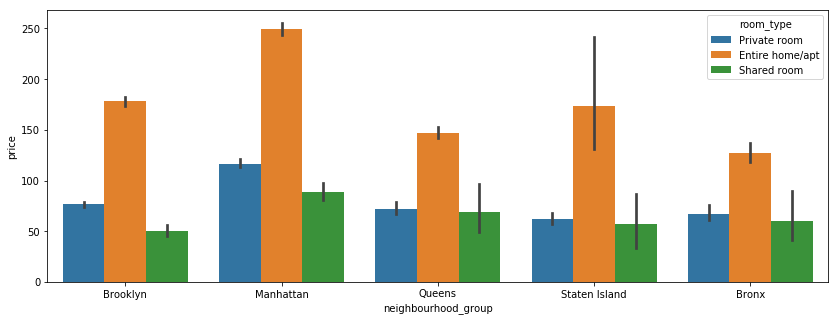

In [133]:
ax = sns.barplot(x="neighbourhood_group", y="price", data=df, hue="room_type" )
ax.figure.set_size_inches(14,5)

price per neighborhood

In [163]:
price_per_neigh = df.groupby(["neighbourhood_group", "room_type"]).apply(
    lambda x: x['price'].median()).reset_index(name="median_price")
price_per_neigh

,neighbourhood_group,room_type,median_price
0,Bronx,Entire home/apt,100.0
1,Bronx,Private room,53.5
2,Bronx,Shared room,40.0
3,Brooklyn,Entire home/apt,145.0
4,Brooklyn,Private room,65.0
5,Brooklyn,Shared room,36.0
6,Manhattan,Entire home/apt,191.0
7,Manhattan,Private room,90.0
8,Manhattan,Shared room,69.0
9,Queens,Entire home/apt,120.0


In [164]:
avail_per_neigh = df.groupby(["neighbourhood_group", "room_type"]).apply(
    lambda x: x['price'].count()).reset_index(name="total_availability")
avail_per_neigh

,neighbourhood_group,room_type,total_availability
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [169]:
review_per_neigh = df.groupby(["neighbourhood_group", "room_type"]).apply(
    lambda x: x['reviews_per_month'].median()).reset_index(name="median_number_of_reviews")
review_per_neigh

,neighbourhood_group,room_type,median_number_of_reviews
0,Bronx,Entire home/apt,1.940
1,Bronx,Private room,1.195
2,Bronx,Shared room,0.850
3,Brooklyn,Entire home/apt,0.680
4,Brooklyn,Private room,0.630
5,Brooklyn,Shared room,0.750
6,Manhattan,Entire home/apt,0.530
7,Manhattan,Private room,0.750
8,Manhattan,Shared room,1.300
9,Queens,Entire home/apt,1.330


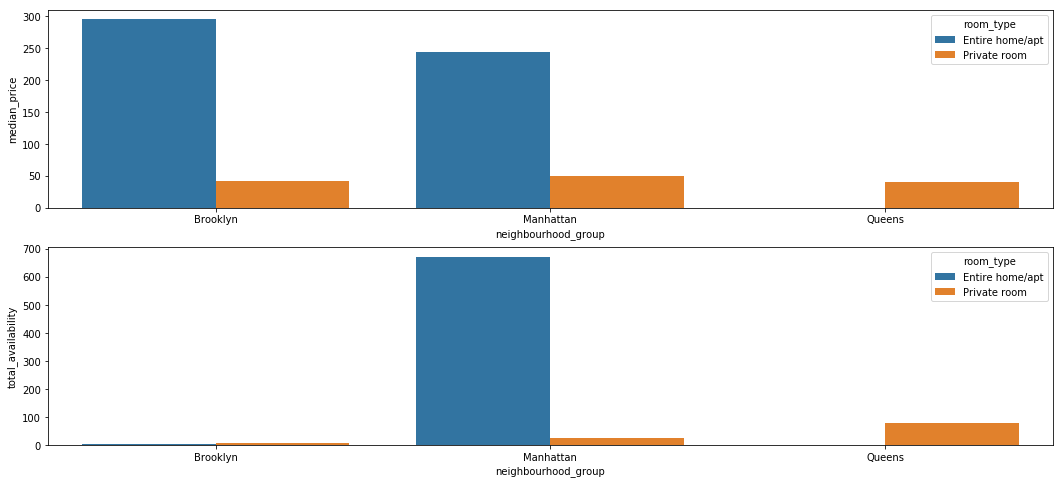

In [226]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
sns.barplot(x="neighbourhood_group", y="median_price", data=price_per_neigh, hue="room_type", ax= axes[0] )
sns.barplot(x="neighbourhood_group", y="total_availability", data=avail_per_neigh, hue="room_type", ax = axes[1] )
# sns.barplot(x="neighbourhood_group", y="median_number_of_reviews", data=review_per_neigh, hue="room_type", ax = axes[2] )
fig.savefig("plot1.pdf")

In [168]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'first', 'second', 'first', 'second', 'first',
       'second', 'are_couple'],
      dtype='object')

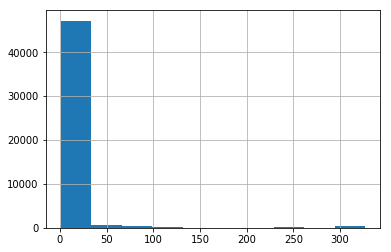

In [174]:
df.calculated_host_listings_count.hist()

In [175]:
df_above_100 = df[df.calculated_host_listings_count>=100]
df_above_100.shape

(783, 23)

In [176]:
avail_per_neigh = df_above_100.groupby(["neighbourhood_group", "room_type"]).apply(
    lambda x: x['price'].count()).reset_index(name="total_availability")
avail_per_neigh

,neighbourhood_group,room_type,total_availability
0,Brooklyn,Entire home/apt,2
1,Brooklyn,Private room,6
2,Manhattan,Entire home/apt,672
3,Manhattan,Private room,24
4,Queens,Private room,79


In [177]:
price_per_neigh = df_above_100.groupby(["neighbourhood_group", "room_type"]).apply(
    lambda x: x['price'].median()).reset_index(name="median_price")
price_per_neigh

,neighbourhood_group,room_type,median_price
0,Brooklyn,Entire home/apt,295.0
1,Brooklyn,Private room,42.0
2,Manhattan,Entire home/apt,244.0
3,Manhattan,Private room,49.5
4,Queens,Private room,41.0


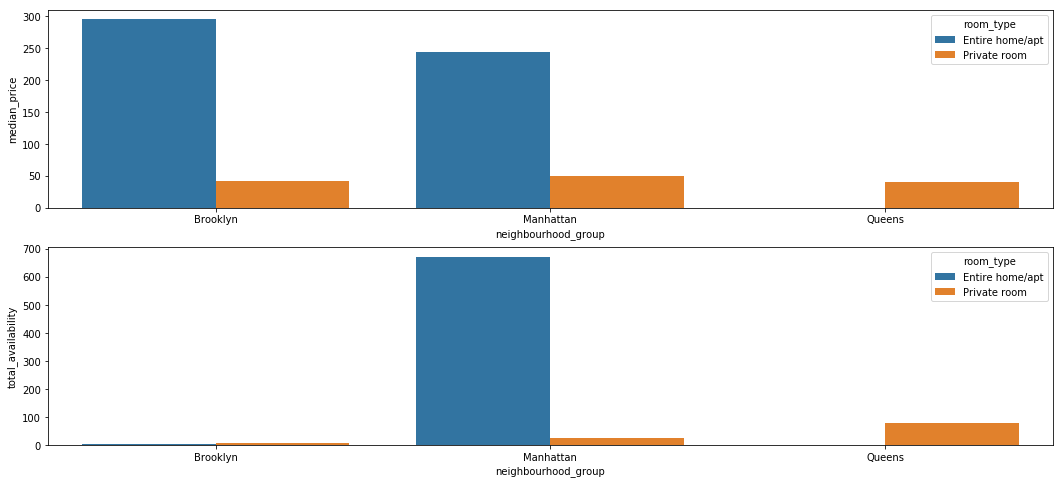

In [178]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
sns.barplot(x="neighbourhood_group", y="median_price", data=price_per_neigh, hue="room_type", ax= axes[0] )
sns.barplot(x="neighbourhood_group", y="total_availability", data=avail_per_neigh, hue="room_type", ax = axes[1] )
# sns.barplot(x="neighbourhood_group", y="median_number_of_reviews", data=review_per_neigh, hue="room_type", ax = axes[2] )


In [179]:
df_above_100

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,first,second,first,second,first,second,are_couple
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,...,0.09,121,364,first,second,Kara,None,Kara,None,No
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,...,NaN,121,174,first,second,Kara,None,Kara,None,No
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,...,NaN,121,364,first,second,Kara,None,Kara,None,No
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,...,NaN,121,201,first,second,Kara,None,Kara,None,No
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,...,0.07,121,161,first,second,Kara,None,Kara,None,No
10530,8078896,Upscale Studio Apt in NYC'S Theatre District!,30283594,Kara,Manhattan,Theater District,40.76145,-73.98556,Entire home/apt,203,...,NaN,121,365,first,second,Kara,None,Kara,None,No
10531,8081037,Lavish Studio with Great Amenities in FiDi,30283594,Kara,Manhattan,Financial District,40.70550,-74.00812,Entire home/apt,189,...,0.11,121,365,first,second,Kara,None,Kara,None,No
10643,8185845,1-Bedroom Upper East Side Apartment!,30283594,Kara,Manhattan,Upper East Side,40.76391,-73.95938,Entire home/apt,249,...,0.10,121,273,first,second,Kara,None,Kara,None,No
10803,8319784,~Lavish 1 Bedroom Upper East Side NYC Apt!,30283594,Kara,Manhattan,Upper East Side,40.76483,-73.95801,Entire home/apt,249,...,0.04,121,273,first,second,Kara,None,Kara,None,No
10804,8320129,Cozy Studio Apt Upper East Side Near Hospitals,30283594,Kara,Manhattan,Upper East Side,40.76137,-73.96042,Entire home/apt,199,...,0.11,121,365,first,second,Kara,None,Kara,None,No


In [183]:
df_above_100

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,first,second,first,second,first,second,are_couple
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,...,0.09,121,364,first,second,Kara,None,Kara,None,No
10075,7730160,Furnished NYC 1BR apt near Rockefeller Center!!!,30283594,Kara,Manhattan,Theater District,40.75967,-73.98573,Entire home/apt,135,...,NaN,121,174,first,second,Kara,None,Kara,None,No
10335,7913426,LUX 1-Bedroom NYC Apartment Near Times Square!,30283594,Kara,Manhattan,Theater District,40.75654,-73.98891,Entire home/apt,369,...,NaN,121,364,first,second,Kara,None,Kara,None,No
10398,7966358,NYC High End 2BR Midtown West Apt,30283594,Kara,Manhattan,Midtown,40.76633,-73.98145,Entire home/apt,335,...,NaN,121,201,first,second,Kara,None,Kara,None,No
10490,8045421,NYC Chelsea Luxury 1BR Apt,30283594,Kara,Manhattan,Chelsea,40.74465,-73.99253,Entire home/apt,129,...,0.07,121,161,first,second,Kara,None,Kara,None,No
10530,8078896,Upscale Studio Apt in NYC'S Theatre District!,30283594,Kara,Manhattan,Theater District,40.76145,-73.98556,Entire home/apt,203,...,NaN,121,365,first,second,Kara,None,Kara,None,No
10531,8081037,Lavish Studio with Great Amenities in FiDi,30283594,Kara,Manhattan,Financial District,40.70550,-74.00812,Entire home/apt,189,...,0.11,121,365,first,second,Kara,None,Kara,None,No
10643,8185845,1-Bedroom Upper East Side Apartment!,30283594,Kara,Manhattan,Upper East Side,40.76391,-73.95938,Entire home/apt,249,...,0.10,121,273,first,second,Kara,None,Kara,None,No
10803,8319784,~Lavish 1 Bedroom Upper East Side NYC Apt!,30283594,Kara,Manhattan,Upper East Side,40.76483,-73.95801,Entire home/apt,249,...,0.04,121,273,first,second,Kara,None,Kara,None,No
10804,8320129,Cozy Studio Apt Upper East Side Near Hospitals,30283594,Kara,Manhattan,Upper East Side,40.76137,-73.96042,Entire home/apt,199,...,0.11,121,365,first,second,Kara,None,Kara,None,No


In [193]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'first', 'second', 'first', 'second', 'first',
       'second', 'are_couple'],
      dtype='object')

In [215]:
#initialize the map around LA County
NYMap = folium.Map(location=[40.758896, -73.985130], tiles='Stamen Toner', zoom_start=12)

# #add the shape of LA County to the map
# folium.GeoJson(laArea).add_to(laMap)

# #for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for i,row in df_above_100.iterrows():
    folium.CircleMarker((row.latitude,row.longitude), weight=2, color='red',
                        fill_color='red', fill_opacity=.5, radius = row.availability_365/360).add_to(NYMap)


In [216]:
NYMap

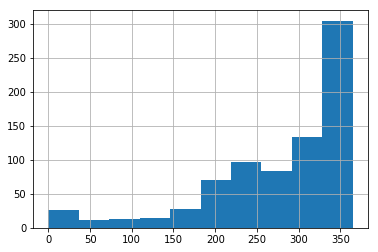

In [199]:
df_above_100.availability_365.hist()

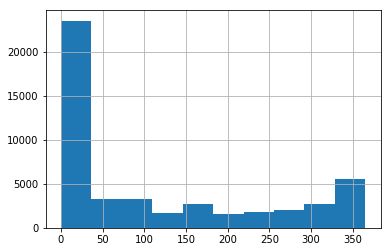

In [204]:
df.loc[df.index.difference(df_above_100.index)].availability_365.hist()

In [ ]:
df_above_100

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(18,8))
sns.barplot(x="neighbourhood_group", y="median_price", data=price_per_neigh, hue="room_type", ax= axes[0] )
sns.barplot(x="neighbourhood_group", y="total_availability", data=avail_per_neigh, hue="room_type", ax = axes[1] )
# sns.barplot(x="neighbourhood_group", y="median_number_of_reviews", data=review_per_neigh, hue="room_type", ax = axes[2] )


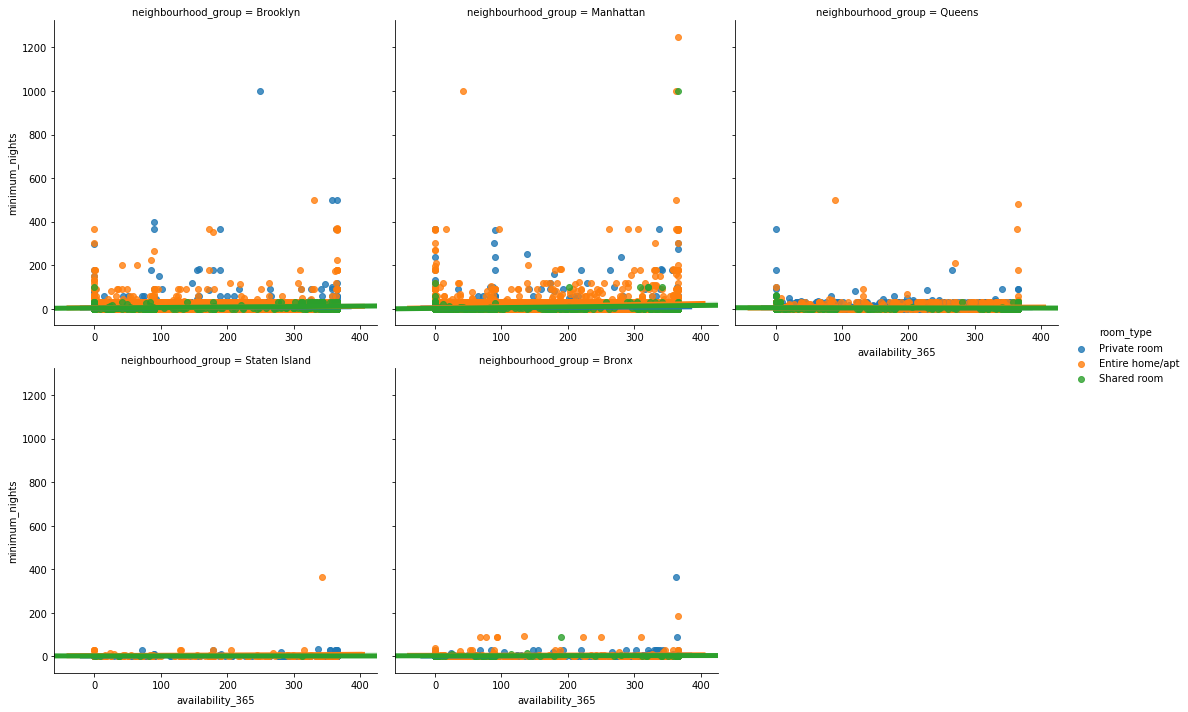

In [224]:
grid = sns.lmplot(x='availability_365', y='minimum_nights',
                  hue='room_type', col='neighbourhood_group', col_wrap=3,
                  sharex=False,
                  line_kws = {'linewidth':5},
                  data=df)
# grid.set(ylim=(20000, 120000))

In [221]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'first', 'second', 'first', 'second', 'first',
       'second', 'are_couple'],
      dtype='object')

In [225]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [157]:
axes[0]

In [131]:
df.neighbourhood_group

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
5        Manhattan
6         Brooklyn
7        Manhattan
8        Manhattan
9        Manhattan
10       Manhattan
11       Manhattan
12        Brooklyn
13       Manhattan
14       Manhattan
15        Brooklyn
16        Brooklyn
17       Manhattan
18        Brooklyn
19       Manhattan
20        Brooklyn
21        Brooklyn
22        Brooklyn
23        Brooklyn
24        Brooklyn
25        Brooklyn
26       Manhattan
27       Manhattan
28       Manhattan
29       Manhattan
           ...    
48865    Manhattan
48866       Queens
48867     Brooklyn
48868     Brooklyn
48869     Brooklyn
48870     Brooklyn
48871    Manhattan
48872    Manhattan
48873     Brooklyn
48874    Manhattan
48875    Manhattan
48876    Manhattan
48877     Brooklyn
48878       Queens
48879     Brooklyn
48880     Brooklyn
48881     Brooklyn
48882     Brooklyn
48883    Manhattan
48884     Brooklyn
48885    Manhattan
48886    Man

In [97]:
df["are_couple"] = df.apply((lambda x: "No" if x["second"].isnull() else "Yes"), axis=1)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index 0')

In [74]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,first,second
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,first,second
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,first,second
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,first,second
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,first,second
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,first,second
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,first,second
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,first,second
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,first,second
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,first,second
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,first,second


In [70]:
df["first"], df["second"] = df.a.apply(find_couples)

ValueError: too many values to unpack (expected 2)

In [14]:
df.host_name[10].split(" ")

['Lena']